In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shape_0 = gpd.read_file('../data/semi-processed/shape_cat_0.shp')
(shape_0.to_crs(epsg=4326, inplace=True))
shape_0_open = shape_0.geometry.unary_union

In [3]:
shape_1 = gpd.read_file('../data/semi-processed/shape_cat_1.shp')
shape_1.to_crs(epsg=4326, inplace=True)
shape_1_open = shape_1.geometry.unary_union

In [4]:
shape_2 = gpd.read_file('../data/semi-processed/shape_cat_2.shp')
shape_2.to_crs(epsg=4326, inplace=True)
shape_2_open = shape_2.geometry.unary_union

In [5]:
shape_3 = gpd.read_file('../data/semi-processed/shape_cat_3.shp')
shape_3.to_crs(epsg=4326, inplace=True)
shape_3_open = shape_3.geometry.unary_union

In [6]:
bridges = pd.read_csv('../data/semi-processed/cleaned_bridges_final.csv')
bridges

,Unnamed: 0,road,km,type,LRPName,name,length,condition,structureNr,roadName,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,lanes
0,0,R250,8.107,Box Culvert,LRP008a,HELAL PUR BOX CULVERT,4.50,A,100489,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1995.0,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.852237,91.934565,interpolate,2.0
1,1,R250,12.648,Box Culvert,LRP013a,SUKNA BOX CULVERT,3.00,A,100487,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1995.0,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.853910,91.976418,interpolate,2.0
2,2,R250,15.317,Box Culvert,LRP015b,FULBARI BOX CULVERT,3.00,A,100491,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1995.0,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.854289,92.001478,interpolate,2.0
3,3,R250,14.563,Box Culvert,LRP015a,FULBARI BOX CULVERT,3.00,A,100490,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1995.0,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.856098,91.994234,interpolate,2.0
4,4,R250,14.032,Box Culvert,LRP014a,BOYTIKOL BOX CULVERT,3.00,A,100488,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1995.0,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.857246,91.989462,interpolate,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2380,N204,29.610,Box Culvert,LRP035c,CRIKOTA,1.55,A,104081,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1965.0,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.232763,91.504116,interpolate,2.0
2381,2381,N204,31.801,Box Culvert,LRP038a,DURGAPUR,1.50,A,104084,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1965.0,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.249896,91.493845,interpolate,2.0
2382,2382,N204,32.210,RCC Girder Bridge,LRP038b,DORGAPUR RCC GIDER BRIDGE,17.80,C,104082,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1965.0,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.252372,91.491274,interpolate,2.0
2383,2383,N204,33.550,Box Culvert,LRP040a,NEAR SHAIS TAGAMJ BOX CULVERT,4.50,A,104077,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1988.0,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.261595,91.482321,interpolate,2.0


In [7]:
# Make geometry points from the lon-lat coordinates of the bridges 
df_points = gpd.GeoDataFrame(bridges, 
                             geometry=gpd.points_from_xy(bridges.lon, bridges.lat),
                             crs='EPSG:4326')

# Make the visualisations for one shapefile

In [8]:
within_cat_0 = df_points[df_points.geometry.within(shape_0_open)]
outside_cat_0 = df_points[~df_points.geometry.within(shape_0_open)]

In [9]:
within_cat_0

,Unnamed: 0,road,km,type,LRPName,name,length,condition,structureNr,roadName,...,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,lanes,geometry
2000,2000,N1,1.8,Box Culvert,LRP001a,.,11.3,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,...,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate,6.0,POINT (90.45886 23.69874)


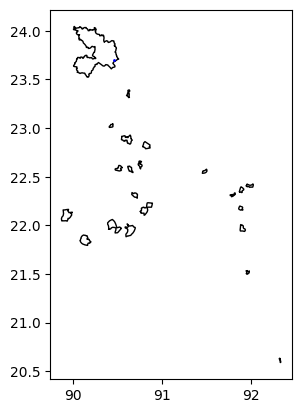

In [10]:
ax = shape_0.plot(color='white', edgecolor='black')
within_cat_0.plot(ax=ax, color='blue', markersize=1)
plt.show()

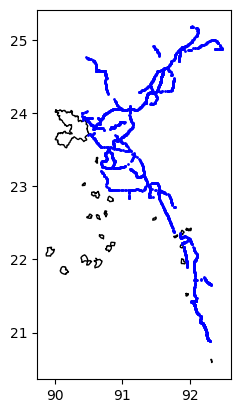

In [11]:
ax = shape_0.plot(color='white', edgecolor='black')
outside_cat_0.plot(ax=ax, color='blue', markersize=1)
plt.show()

In [12]:
within_cat_1 = df_points[df_points.geometry.within(shape_1_open)]
outside_cat_1 = df_points[~df_points.geometry.within(shape_1_open)]

In [13]:
within_cat_2 = df_points[df_points.geometry.within(shape_2_open)]
outside_cat_2 = df_points[~df_points.geometry.within(shape_2_open)]

In [14]:
within_cat_3 = df_points[df_points.geometry.within(shape_3_open)]
outside_cat_3 = df_points[~df_points.geometry.within(shape_3_open)]

# Add vulnerability catagories based on the structure numbers

In [15]:
cat_0_list = within_cat_0['structureNr'].to_list()
cat_1_list = within_cat_1['structureNr'].to_list()
cat_2_list = within_cat_2['structureNr'].to_list()
cat_3_list = within_cat_3['structureNr'].to_list()

In [16]:
def add_vul_cat(dataframe, list0, list1, list2, list3):
    df = dataframe.copy() 
    for row in range(len(df)):
        if df.loc[row, 'structureNr'] in list0:
            df.at[row, 'vul_cat'] = 0
        elif df.loc[row, 'structureNr'] in list1:
            df.at[row, 'vul_cat'] = 1
        elif df.loc[row, 'structureNr'] in list2:
            df.at[row, 'vul_cat'] = 2
        elif df.loc[row, 'structureNr'] in list3:
            df.at[row, 'vul_cat'] = 3
    return df

In [17]:
bridges_vul_index = add_vul_cat(bridges, cat_0_list, cat_1_list, cat_2_list, cat_3_list)
bridges_vul_index

,Unnamed: 0,road,km,type,LRPName,name,length,condition,structureNr,roadName,...,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,lanes,vul_cat
0,0,R250,8.107,Box Culvert,LRP008a,HELAL PUR BOX CULVERT,4.50,A,100489,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.852237,91.934565,interpolate,2.0,2.0
1,1,R250,12.648,Box Culvert,LRP013a,SUKNA BOX CULVERT,3.00,A,100487,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.853910,91.976418,interpolate,2.0,2.0
2,2,R250,15.317,Box Culvert,LRP015b,FULBARI BOX CULVERT,3.00,A,100491,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.854289,92.001478,interpolate,2.0,2.0
3,3,R250,14.563,Box Culvert,LRP015a,FULBARI BOX CULVERT,3.00,A,100490,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.856098,91.994234,interpolate,2.0,2.0
4,4,R250,14.032,Box Culvert,LRP014a,BOYTIKOL BOX CULVERT,3.00,A,100488,Sylhet-Golapganj-Charkhai-Jakiganj Road,...,1.0,Sylhet,Sylhet,Sylhet,Golapganj,24.857246,91.989462,interpolate,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2380,N204,29.610,Box Culvert,LRP035c,CRIKOTA,1.55,A,104081,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.232763,91.504116,interpolate,2.0,2.0
2381,2381,N204,31.801,Box Culvert,LRP038a,DURGAPUR,1.50,A,104084,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.249896,91.493845,interpolate,2.0,2.0
2382,2382,N204,32.210,RCC Girder Bridge,LRP038b,DORGAPUR RCC GIDER BRIDGE,17.80,C,104082,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.252372,91.491274,interpolate,2.0,2.0
2383,2383,N204,33.550,Box Culvert,LRP040a,NEAR SHAIS TAGAMJ BOX CULVERT,4.50,A,104077,Jagadishpur-Chunarughat-Shaistaganj (old part),...,1.0,Sylhet,Moulavi Bazar,Habiganj,Shaistagonj,24.261595,91.482321,interpolate,2.0,2.0


In [18]:
bridges_vul_index.isna().sum()

Unnamed: 0           0
road                 0
km                   0
type                 0
LRPName              0
name                 0
length               0
condition            0
structureNr          0
roadName             0
chainage             0
width               18
constructionYear    18
spans               18
zone                 0
circle               0
division             0
sub-division         0
lat                  0
lon                  0
EstimatedLoc         0
lanes                0
vul_cat              0
dtype: int64

In [19]:
bridges_vul_index['vul_cat'].value_counts()

vul_cat
2.0    1755
1.0     586
3.0      43
0.0       1
Name: count, dtype: int64

In [20]:
len(cat_3_list)

43

In [21]:
bridges_vul_index.to_csv('../data/semi-processed/bridges_vul_index.csv')